# Orbitales Atómicos

Para la parte angular se tiene la ecuación de valores propios
\begin{equation}
\Lambda^2 Y_l^{m_l} = -l(l+1)\hbar^2 Y_l^{m_l}
\end{equation}

Donde $\Lambda^2$ es el legendriano
\begin{equation}
\Lambda^2 = \frac{1}{sin^2 \theta} \frac{\partial^2}{\partial \phi^2} + \frac{1}{sin \theta} \frac{\partial}{\partial \theta} sin \theta \frac{\partial}{\partial \theta} 
\end{equation}

**La solución a la parte angular son los armónios esféricos $Y_l^{m_l}(\theta,\phi)$.**

Note que $l$ y $m_l$ son números cuánticos que deben cumplir:
\begin{eqnarray}
l&=& 0,1,2,3,...\\
m_l &=& -l,-l+1,...,0,...,l-1,l
\end{eqnarray}

En la tabla se muestran los primeros armónicos esféricos.


|$l$|$m_l$|Armónico esférico $Y_l^{m_l}(\theta,\phi)$|
|---|---|---|
|0|0|$\frac{1}{(4\pi)^{1/2}}$|
|1|-1|$+\frac{3}{(8\pi)^{1/2}} sin \theta e^{-i\phi}$|
|1|0|$\frac{3}{(4\pi)^{1/2}} cos \theta$|
|1|1|$-\frac{3}{(8\pi)^{1/2}} sin \theta e^{i\phi}$|
|2|-2|$\frac{15}{(32\pi)^{1/2}} sin^2 \theta e^{-2i\phi}$|
|2|-1|$+\frac{15}{(8\pi)^{1/2}} sin \theta cos \theta e^{-i\phi}$|
|2|0|$\frac{5}{(16\pi)^{1/2}} (3cos^2 \theta - 1)$|
|2|1|$-\frac{15}{(8\pi)^{1/2}} sin \theta cos \theta e^{i\phi}$|
|2|2|$\frac{15}{(32\pi)^{1/2}} sin^2 \theta e^{2i\phi}$|



Importamos librerias

In [1]:
#%matplotlib notebook
from scipy import special
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Definirmos un mallado que considere $\theta \in [0,\pi]$ y $\phi\in[0,2\pi]$

La idea es pensar en graficar una figura en tres dimensiones
<img src="https://fotos.subefotos.com/c3fdbd7a7bdcdf59a0ba48e8d85191b5o.jpg" alt="Figura 3D" width="200"/>
y que necesitaremos todas las combinaciones de todos los valores de $\theta$ y $\phi$
<img src="https://fotos.subefotos.com/c89ac08947348992ec8fb7765039accfo.jpg" alt="Representación de mallado" width="200"/>

In [2]:
theta = np.linspace(0,np.pi,200)
phi = np.linspace(0,2*np.pi,200)
THETA,PHI = np.meshgrid(theta,phi)

Seleccionaremos un valor de $l$ y $m_l$

In [3]:
l = 1
ml = 1

A continuación graficaremos armónicos esféricos y su cuadrado.

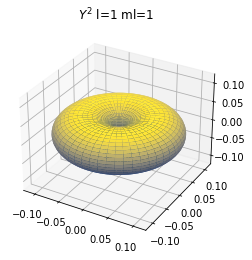

In [4]:
R = abs(special.sph_harm(ml,l,PHI,THETA))
R = R**2

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,cmap='cividis')
ax.set_xlim(-R.max(),R.max())
ax.set_ylim(-R.max(),R.max())
ax.set_zlim(-R.max(),R.max())

ax.set_title("$Y^2$"+" l="+str(l)+" ml="+str(ml))

plt.show()

Recordemos que la función de onda es el producto de una parte radial y una parte angular $\psi_{n,l,m_l}=R_{n,l}(r)Y_l^{m_l}(\theta,\phi)$

Nombraremos a los orbitales p como:
\begin{eqnarray}
\color{green}{p_z} &=& R_{n1} \color{blue}{Y_{1}^{0}} = R_{n1} \left(\frac{3}{4 \pi}\right)^{1/2} cos \theta \\
\color{green}{p_-} &=& R_{n1} \color{blue}{Y_{1}^{-1}} = R_{n1} \left(\frac{3}{8 \pi}\right)^{1/2} sin \theta \color{red}{e^{-i\phi}}\\
\color{green}{p_+} &=& R_{n1} \color{blue}{Y_{1}^{+1}} = -R_{n1} \left(\frac{3}{8 \pi}\right)^{1/2} sin \theta \color{red}{e^{i\phi}}
\end{eqnarray}

El orbital $p_z$ es real, pero $p_-$ y $p_+$ son complejos. Recordando la fórmula de Euler:
\begin{eqnarray}
e^{-i\phi} &=& cos(\phi) - i sin(\phi)\\
-e^{i\phi} &=& -cos(\phi) - i sin(\phi)
\end{eqnarray}

Hacemos la combinación lineal:
\begin{eqnarray}
\color{purple}{p_x} &=& \frac{1}{\sqrt{2}}(\color{green}{p_-} - \color{green}{p_+}) = R_{n1} \left(\frac{3}{4 \pi}\right)^{1/2} sin \theta cos \phi \\
\color{purple}{p_y} &=& \frac{i}{\sqrt{2}}(\color{green}{p_-} + \color{green}{p_+}) = R_{n1} \left(\frac{3}{4 \pi}\right)^{1/2} sin \theta sin \phi 
\end{eqnarray}

Represente la parte angular de las combinaciones lineales de $p_-$ y $p_+$ para formar $p_x$ y $p_y$.

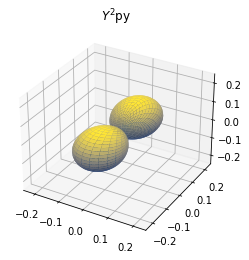

In [5]:
Rz = special.sph_harm(0,1,PHI,THETA)
R_m = special.sph_harm(-1,1,PHI,THETA)
R_p = special.sph_harm(+1,1,PHI,THETA)

R_x = (R_m-R_p)/np.sqrt(2)
R_y = 1j*(R_m+R_p)/np.sqrt(2)

R = abs(R_y)
orb_name = "py"
R = R**2

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='cividis')
ax.set_xlim(-R.max(),R.max())
ax.set_ylim(-R.max(),R.max())
ax.set_zlim(-R.max(),R.max())
ax.set_title("$Y^2$"+orb_name)

plt.show()

A continuación se dan las expresiones de algunos orbitales

|Orbital|Función de onda|
|-------|---------------|
|$1s$|$N_1 e^{-r}$|
|$2s$|$N_2 (2-r)e^{-r/2}$|
|$2p_x$|$N_2 r sin\theta cos\phi e^{-r/2}$|
|$2p_y$|$N_2 r sin\theta sin\phi e^{-r/2}$|
|$2p_z$|$N_2 r cos\theta e^{-r/2}$|


# Referencias

- Atkins, P. W.; Friedman, R. Molecular Quantum Mechanics, 4th ed.; Oxford University Press: New York, 2005.
- Pilar, F. L. Elementary Quantum Chemistry; 2001.
- Zettili, N. Quantum Mechanics: Concepts and Applications, 2nd ed.; Wiley: Chichester, U.K, 2009.
- Levine, I. N. Quantum Chemistry, 5th ed.; Prentice Hall: Upper Saddle River, N.J, 2000.
- McQuarrie, D. A.; Simon, J. D. Physical Chemistry: A Molecular Approach; University Science Books: Sausalito, Calif, 1997.

Este archivo puede distribuise libremente y ser considerado Open Source. Si deseas modificarlo para su distribución, solo se pide conservar el nombre de los autores originales.